In [0]:
import random
from google.colab import drive
drive.mount('/content/gdrive')

import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()


import os


Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
1.15.0


In [0]:
def getcategories(categories,list_of_files,path):
    for files in os.listdir(path):
        if ".mf" not in files:
            categories.append(files)
            list_of_files[files] = list()
            newPath = os.path.join(path,files)
            for f in os.listdir(newPath):
                list_of_files[files].append(f)
    #print(list_of_files)
    return(categories,list_of_files)
train_directory = '/content/gdrive/My Drive/train1'
categories=[]    
list_of_files = {} # a dictionary with the genre as the key value. For every key value, we have a list which contains the names of the audio files contained within that genre folder
categories,list_of_files = getcategories(categories,list_of_files,train_directory)

In [0]:
import cv2
def get_index(category,categories):
    print(category)
    for i in range(0,len(categories)):
        if(categories[i]==category):
            break
    return(i)

def genTrainTest(training_data,test_data,list_of_files,categories,directory):
    list1 = [x for x in range(100)] #Since we have 100 files in each genre, I take a list which contains values like [0,1,2,3,4,.....,100].
    list2 = list1 #create a backup of list1
    for category in list_of_files.keys(): #For each music genre
        category1 = category + "/"
        path = os.path.join(directory,category1) #helps to navigate through the required genre directory
        #print(path)
        class_label = get_index(category,categories) #we have to represent each category by a number which is nothing but the position of the genre name in the categories list. 
        test_index=[]
        for direc,_,filenames in os.walk(path):
              #print("Length of filenames"+str(len(filenames)))
             # print(filenames)
              random.shuffle(list1) #shuffling the list 
              train_index = list1[:90] #take the first 70 random indices as train indices
              #print("List1: "+str(list1))
              #print("Training index: "+str(train_index))
              #print(len(train_index))
              #count=0
              #count1 = 0
              #count2=0
              #print(len(list1))
              for i in range(0,len(list1)):
                if(list1[i] not in train_index):
                    test_index.append(list1[i]) #remaining 30 for test indices
              #print(count,count1,count2)
              #print(train1_index==train_index)
              #test_index = list(set(list1)-set(train_index))
              #print(len(test_index))
              #print("Test index: "+str(test_index))


              for i in train_index:
                    full_path=os.path.join(path,filenames[i]) #navigate to each genre subfolder
                    img_arr = cv2.imread(full_path) #Read the image
                    #print(img_arr)
                    im_rgb = cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB) #Convert into RGB as colour is important
                    #print(im_rgb.shape)


                    #plt.imshow(im_rgb)
                    #plt.show()
                    training_data.append([im_rgb,class_label]) #each row in the training data contains the rgb numpy matrix and the class label 



              for i in test_index:
                    full_path=os.path.join(path,filenames[i])
                    img_arr = cv2.imread(full_path)
                    #print(img_arr.shape)
                    im_rgb = cv2.cvtColor(img_arr,cv2.COLOR_BGR2RGB)
                    #print(im_rgb.shape)
                    #plt.imshow(im_rgb)
                    #plt.show()
                    test_data.append([im_rgb,class_label]) #similarly for test data
                    
                    
    return training_data,test_data

In [0]:
def convert_to_numpy(training_data,test_data):
    X=[]
    Y=[]
    for features,class_label in training_data:
        X.append(features)
        Y.append(class_label)
        
    #X has to be a numpy array
    Y=np.array(Y)
    #X=np.asarray(X)
    #print(len(X[0]))
    #print(len(X[0][0]))
    #print(len(X[0][0][0]))
    #X=np.array(X)
    X=np.array(X)
    #print(X.shape)
    #print(Y.shape)
    np.save("X.npy",X)
    np.save("Y.npy",Y)


    X2 = []
    Y2 = []
    for features, class_label in test_data:
        X2.append(features)
        Y2.append(class_label)
    X2 = np.array(X2)
    Y2 = np.array(Y2)
    np.save("X2.npy",X2)
    np.save("Y2.npy",Y2)


    return(X,Y,X2,Y2)

In [0]:


import tensorflow as tf
print(tf.__version__)
tf.test.gpu_device_name()

1.15.0


'/device:GPU:0'

In [0]:


training_data=[]
test_data=[]
training_data, test_data = genTrainTest(training_data,test_data,list_of_files,categories,train_directory)
print(len(training_data))
print(len(test_data))

metal
country
pop
blues
reggae
jazz
disco
hiphop
rock
classical
900
100


In [0]:
import numpy as np
import keras
from keras.models import Sequential,Model
from keras.utils import to_categorical
from keras.layers import Dense, LSTM,Conv2D, Dropout,Input, Flatten,Activation,MaxPooling2D,AveragePooling2D,BatchNormalization,Conv3D
from keras.layers import TimeDistributed
from keras.callbacks import ModelCheckpoint

def convert_to_numpy(training_data,test_data):
    X=[]
    Y=[]
    for features,class_label in training_data:
        X.append(features)
        Y.append(class_label)
        
    #X has to be a numpy array
    Y=np.array(Y)
    #X=np.asarray(X)
    #print(len(X[0]))
    #print(len(X[0][0]))
    #print(len(X[0][0][0]))
    #X=np.array(X)
    X=np.array(X)
    #print(X.shape)
    #print(Y.shape)
    np.save("X.npy",X)
    np.save("Y.npy",Y)


    X2 = []
    Y2 = []
    for features, class_label in test_data:
        X2.append(features)
        Y2.append(class_label)
    X2 = np.array(X2)
    Y2 = np.array(Y2)
    np.save("X2.npy",X2)
    np.save("Y2.npy",Y2)


    return(X,Y,X2,Y2)



def train_model():

    
    model = Sequential()
    model.add(Conv2D(32,(3,3),padding='same',activation='relu',input_shape=(480,640,3)))
    model.add(Conv2D(32,(3,3),activation='relu'))
    model.add(AveragePooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64,(4,4),padding='same',activation='relu',strides=(2,2)))
    model.add(Conv2D(64,(4,4),activation='relu',strides=(2,2)))
    model.add(AveragePooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))

    model.add(Conv2D(64,(4,4),padding='same',activation='relu'))
    model.add(Conv2D(64,(4,4),activation='relu'))
    model.add(AveragePooling2D(pool_size = (2,2)))
    model.add(Dropout(0.25))
    #model.add(Conv2D(64,(10,10),padding='same',activation='relu',strides=(2,2)))
    #model.add(Conv2D(64,(10,10),activation='relu',strides=(2,2)))
    #model.add(MaxPooling2D(pool_size = (2,2)))
    #model.add(Dropout(0.25))

    #LSTM


    #model.add(LSTM(96,input_shape=(7,704)))
    """
    lstm1,h,c = LSTM(96, return_sequences=True,return_state=True)([lstm1,h,c])
    lstm1,h,c = LSTM(96, return_sequences=False,return_state=True)([lstm1,h,c])
    #y = Lambda(lambda x: tf.keras.backend.concatenate([h,c],0))([lstm1,h,c])
    y = Concatenate()([h,c])
    model_language = Model(inputs=inputs1, outputs=y)
    # combined model
    conc = keras.layers.Multiply()([model_language.output,model.output])
    """



    model.add(Flatten())
    model.add(Dense(1000,activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(512,activation='relu'))
    #model.add(Dropout(0.2))
    model.add(Dense(64,activation='relu'))

    model.add(Dense(10,activation='softmax'))

    model.summary()
    return(model)

















X,Y,X2,Y2 = convert_to_numpy(training_data,test_data) #since training_data and test_data are lists, we need to convert them into numpy arrays for further processing.
print(X.shape)
print(Y.shape)
print(X2.shape)
print(Y2.shape)

X = X.astype('float32') #Convert all the pixel values to float type as we are going to normalise them for training features
X2 = X2.astype('float32') #Convert all the pixel values to float type as we are going to normalise them for test features
X/=255 #Normalising the training features
X2/=255 #Normalising the test features

Y1=to_categorical(Y,10) #use one-hot encoding for training class labels (required for cnn)
Y3 = to_categorical(Y2,10) #use one-hot encoding for test class labels (required for cnn)






(900, 480, 640, 3)
(900,)
(100, 480, 640, 3)
(100,)


In [0]:


model = train_model()
model.compile(optimizer='rmsprop',loss='categorical_crossentropy',metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/CNNModel1.h5',monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history = model.fit(X,Y1,batch_size =32 ,epochs=100,verbose=1,validation_data=(X2,Y3),callbacks=[checkpointer])


Model: "sequential_11"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_61 (Conv2D)           (None, 480, 640, 32)      896       
_________________________________________________________________
conv2d_62 (Conv2D)           (None, 478, 638, 32)      9248      
_________________________________________________________________
average_pooling2d_31 (Averag (None, 239, 319, 32)      0         
_________________________________________________________________
dropout_31 (Dropout)         (None, 239, 319, 32)      0         
_________________________________________________________________
conv2d_63 (Conv2D)           (None, 120, 160, 64)      32832     
_________________________________________________________________
conv2d_64 (Conv2D)           (None, 59, 79, 64)        65600     
_________________________________________________________________
average_pooling2d_32 (Averag (None, 29, 39, 64)      

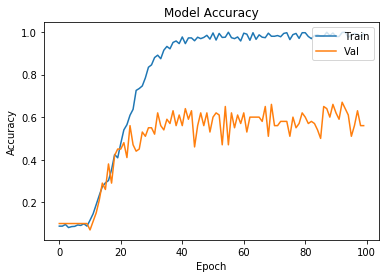

In [0]:
import matplotlib.pyplot as plt
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend(['Train','Val'],loc = 'upper right')
plt.show()
#model.fit(X,Y1,batch_size =32 ,epochs=50,verbose=1,validation_data=(X2,Y3),callbacks=[checkpointer])

In [0]:
from keras.models import load_model
model = load_model('/content/gdrive/My Drive/CNNModel1.h5')
prediction = model.predict_classes(X2)
print(prediction.shape)

(100,)


In [0]:
test_eval = model.evaluate(X2, Y3, verbose=0)
print('Test loss:', test_eval[0])
print('Test accuracy:', test_eval[1])


Test loss: 3.893381175994873
Test accuracy: 0.67


In [0]:
"""
from sklearn.metrics import confusion_matrix 
results = confusion_matrix(Y2, prediction) 
print(results)

from sklearn.metrics import classification_report
target_names = ["Class {}".format(i) for i in range(len(categories))]
print(classification_report(Y2, prediction, target_names=target_names))
"""
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(Y2, prediction)
cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
cm

array([[0.7, 0. , 0. , 0.3, 0. , 0. , 0. , 0. , 0. , 0. ],
       [0. , 0.7, 0. , 0. , 0. , 0.1, 0. , 0.1, 0.1, 0. ],
       [0. , 0. , 0.8, 0. , 0. , 0. , 0. , 0.1, 0.1, 0. ],
       [0.1, 0. , 0. , 0.5, 0. , 0.2, 0. , 0.1, 0.1, 0. ],
       [0. , 0. , 0. , 0. , 0.8, 0. , 0.1, 0.1, 0. , 0. ],
       [0. , 0.1, 0. , 0.1, 0. , 0.8, 0. , 0. , 0. , 0. ],
       [0. , 0. , 0. , 0. , 0.1, 0. , 0.8, 0. , 0. , 0.1],
       [0. , 0. , 0. , 0.3, 0.2, 0. , 0.1, 0.4, 0. , 0. ],
       [0. , 0.2, 0. , 0.2, 0.1, 0. , 0. , 0. , 0.5, 0. ],
       [0. , 0.2, 0. , 0. , 0. , 0.1, 0. , 0. , 0. , 0.7]])

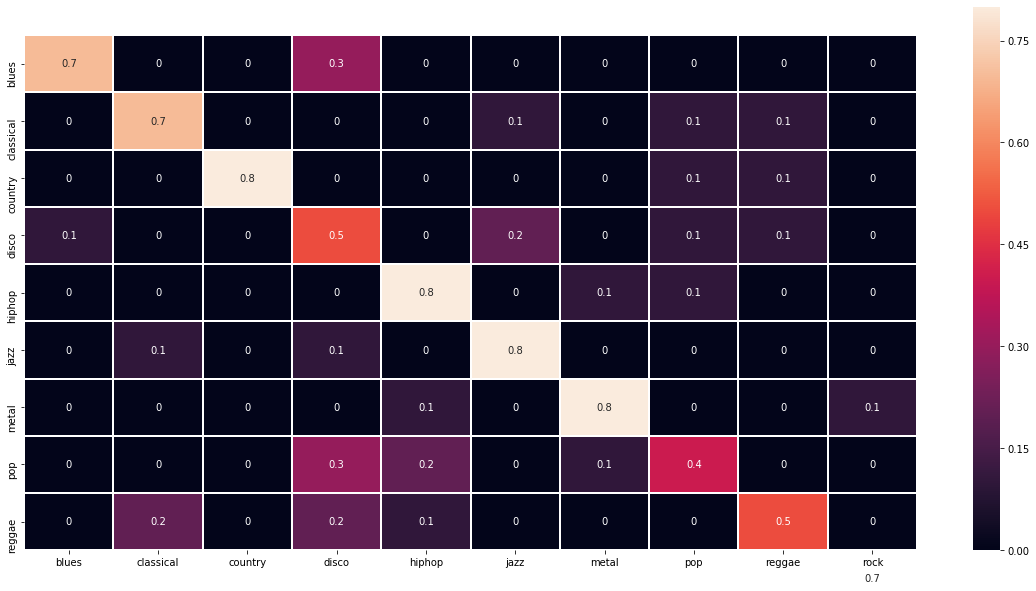

In [0]:
import seaborn as sn
import pandas as pd
import matplotlib.pyplot as plt

df_cm = pd.DataFrame(cm, index = [i for i in ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']],
                  columns = [i for i in ['blues','classical','country','disco','hiphop','jazz','metal','pop','reggae','rock']])
plt.figure(figsize = (20,10))

hm = sn.heatmap(df_cm, annot=True, linewidths=1)

figure = hm.get_figure()    
hm.set_ylim(len(df_cm)-1, -0.5)
plt.show()
figure.savefig('cm3.png',dpi=300,transparent=True)

In [0]:
np.save("/content/gdrive/My Drive/Training_features.npy",X)
np.save("/content/gdrive/My Drive/Training_class_labels.npy",Y)
np.save("/content/gdrive/My Drive/Test_features",X2)
np.save("/content/gdrive/My Drive/Test_class_labels",Y2)





In [0]:
########################RUN FROM THIS CELL


import numpy as np
import keras
from keras.models import Sequential,Model
from keras.utils import to_categorical
from keras.layers import Dense, LSTM,Conv2D, Dropout,Input, Flatten,Activation,MaxPooling2D,AveragePooling2D,BatchNormalization,Conv3D,Conv1D
from keras.layers import TimeDistributed
from keras.callbacks import ModelCheckpoint
from keras import optimizers
#CNNLSTM

X = np.load("/content/gdrive/My Drive/Training_features.npy")
Y= np.load("/content/gdrive/My Drive/Training_class_labels.npy")

In [0]:
X2 = np.load("/content/gdrive/My Drive/Test_features.npy")
Y2 = np.load("/content/gdrive/My Drive/Test_class_labels.npy")

In [0]:
Y1 = to_categorical(Y)
Y3 = to_categorical(Y2)



In [0]:
from keras import optimizers

Inp = Input(shape = (480,640,3))

model = ((Conv2D(32,(3,3),padding='same',activation='relu')))(Inp)
#model.add(TimeDistributed(base_model,input_shape=base_model.input_shape))
model = ((Conv2D(32,(3,3),activation='relu')))(model)
model = ((AveragePooling2D(pool_size = (2,2))))(model)
model = (Dropout(0.25))(model)

model = ((Conv2D(64,(4,4),padding='same',activation='relu')))(model)
model = ((Conv2D(64,(4,4),activation='relu')))(model)
model = ((AveragePooling2D(pool_size = (2,2))))(model)
model = (Dropout(0.25))(model)

model = ((Conv2D(64,(4,4),padding='same',activation='relu')))(model)
model = ((Conv2D(64,(4,4),activation='relu')))(model)
model = ((AveragePooling2D(pool_size = (2,2))))(model)
model  = (Dropout(0.25))(model)
#model.add(Conv2D(64,(10,10),padding='same',activation='relu',strides=(2,2)))
#model.add(Conv2D(64,(10,10),activation='relu',strides=(2,2)))
#model.add(MaxPooling2D(pool_size = (2,2)))
#model.add(Dropout(0.25))

#LSTM


#
"""
lstm1,h,c = LSTM(96, return_sequences=True,return_state=True)([lstm1,h,c])
lstm1,h,c = LSTM(96, return_sequences=False,return_state=True)([lstm1,h,c])
#y = Lambda(lambda x: tf.keras.backend.concatenate([h,c],0))([lstm1,h,c])
y = Concatenate()([h,c])
model_language = Model(inputs=inputs1, outputs=y)
# combined model
conc = keras.layers.Multiply()([model_language.output,model.output])
"""



model = (TimeDistributed(Flatten()))(model)
model = (LSTM(1000,stateful=False,return_sequences=True,activation='relu'))(model)
#model = (Dropout(0.3))(model)
model = (LSTM(500,stateful=False))(model)
#model = (LSTM(200,stateful=False))(model)
#model = (LSTM(50,stateful=False))(model)
#model = (Dropout(0.3))(model)

model = (Dense(100,activation='relu'))(model)
model = (Dropout(0.3))(model)
model = (Dense(50,activation='relu'))(model)
model = (Dropout(0.3))(model)
#model.add(Dense(64,activation='relu'))

model = (Dense(10,activation='softmax'))(model)
#model.build((32,480,640,3))
#model.build(('None',480,640,3))

model_cnn = Model(Inp, model )

model_cnn.summary()


Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         (None, 480, 640, 3)       0         
_________________________________________________________________
conv2d_73 (Conv2D)           (None, 480, 640, 32)      896       
_________________________________________________________________
conv2d_74 (Conv2D)           (None, 478, 638, 32)      9248      
_________________________________________________________________
average_pooling2d_37 (Averag (None, 239, 319, 32)      0         
_________________________________________________________________
dropout_39 (Dropout)         (None, 239, 319, 32)      0         
_________________________________________________________________
conv2d_75 (Conv2D)           (None, 239, 319, 64)      32832     
_________________________________________________________________
conv2d_76 (Conv2D)           (None, 236, 316, 64)      6560

In [0]:
#model1 = trainCNNLSTM1()
sgd = optimizers.SGD(lr=1, momentum=0.9, nesterov=True)
model_cnn.compile(optimizer=sgd,loss='categorical_crossentropy',metrics=['accuracy'])
checkpointer = ModelCheckpoint(filepath='/content/gdrive/My Drive/CNNLSTMModelNew.h5',monitor='val_acc', mode='max', verbose=1, save_best_only=True)
history1 = model_cnn.fit(X,Y1,batch_size =32 ,epochs=100,verbose=1,validation_data=(X2,Y3),callbacks=[checkpointer])

Train on 900 samples, validate on 100 samples
Epoch 1/100
900/900 [==============================] - 29s 32ms/step - loss: 2.3813 - acc: 0.0911 - val_loss: 2.4468 - val_acc: 0.1000

Epoch 00001: val_acc improved from -inf to 0.10000, saving model to /content/gdrive/My Drive/CNNLSTMModelNew.h5
Epoch 2/100
900/900 [==============================] - 22s 25ms/step - loss: 2.3892 - acc: 0.0811 - val_loss: 2.3763 - val_acc: 0.1000

Epoch 00002: val_acc did not improve from 0.10000
Epoch 3/100
900/900 [==============================] - 22s 25ms/step - loss: 2.3666 - acc: 0.0822 - val_loss: 2.3328 - val_acc: 0.1000

Epoch 00003: val_acc did not improve from 0.10000
Epoch 4/100
900/900 [==============================] - 22s 25ms/step - loss: 2.3619 - acc: 0.0978 - val_loss: 2.3736 - val_acc: 0.1000

Epoch 00004: val_acc did not improve from 0.10000
Epoch 5/100
900/900 [==============================] - 22s 25ms/step - loss: 2.3776 - acc: 0.0811 - val_loss: 2.3455 - val_acc: 0.1000

Epoch 00005:

In [0]:
model_cnn.fit(X,Y1,batch_size =32 ,epochs=100,verbose=1,validation_data=(X2,Y3),callbacks=[checkpointer])

In [0]:
model_cnn.fit(X,Y1,batch_size =32 ,epochs=100,verbose=1,validation_data=(X2,Y3),callbacks=[checkpointer])

In [0]:
model_cnn.fit(X,Y1,batch_size =32 ,epochs=100,verbose=1,validation_data=(X2,Y3),callbacks=[checkpointer])